In a previous report I looked at the original GAN paper and image GPT which were both generative models. In my research for image GPT I came across the initial paper the attention mechanism was used for, Attention is All You Need. While it's use has been widespread in NLP, I find it interesting how researchers have been able to adapt it to other tasks in computer vision. This week I'm going to be taking a look at Non-Local Neural Networks which briefly look at an "attention mechanism" in a R-CNN. In the next paper I examine where an attention mechanism is implemented in a GAN to capture global information with the goal of producing better quality images.

### Non-Local Neural Networks

Source: https://openaccess.thecvf.com/content_cvpr_2018/papers/Wang_Non-Local_Neural_Networks_CVPR_2018_paper.pdf

This paper utilizes a method from a more "classical" computer vision approach to capture non-local features in a neural network. The building block that will be implemented in this neural network utilizes a response at a position as a weighted sum of the features at all positions, thus capturing non local features. They suggest that this building block can be used in a variety of computer vision network architectures to achieve state of the art performance, especially in the realm of video classification.

The modeling of long-range dependencies has been essential in the domain of NLP which had been primarily modeled by recurrent networks. In image processing, long-range dependencies have been captured by larger receptive fields in convolutions as well as stacking multiple layers of these operations. Given that we use kernels in convolutional neural networks, we are only able to capture local features, e.g. in a 3x3 or 7x7 field. However, by doing we are being computationally inefficient and optimization can become a challenge. In this paper, non-local operations are introduced which are simple, effective at capturing long-range dependencies, and efficient. The introduction of the non-local mean operation is what will allow us to capture these long-range dependencies.

What are the benefits of using this non-local means operation?
- Non-local operations capture long-range dependencies directly by computing interactions between global positions
- Non-local operations are efficient and only require a few layers
- Non-local operations maintain variable input sizes and can be combined with other operations

To demonstrate the effectiveness of this "new" architecture, they use video classification to show that they are able to capture long-range interactions. 3D convolutional neural networks have been used for such tasks, but are very computationally expensive and this new method is substantially cheaper than these 3D networks. The successes of the non-local network will be seen with the Kinetics, Charades, as well as the COCO dataset.

Moving on to the related works. Non-local image processing (i.e. non-local means) is a filtering algorithm that computes a weighted mean of all pixels in an image. This allows pixels that are not in the local receptive field to be included in the response based on similarity. This method was incorporated into a method called BM3D which performs filtering on a group of similar but non-local patches. BM3D itself performs very well with image denoising and can perform on par with neural networks. In addition to this method of non-local image processesing, long-range dependencies can be modeled by graphical models. One such model is conditional random fields which is primarily used for image segmentation and can be turned into an RNN. However, the researchers suggest a simplified approach and turn to a more abstract model called graph neural networks.

Around the same time of this paper, there emerged the trend of using non-recurrent networks for modeling sequential data in NLP. Long-range dependencies are captured by very deep 1-D convolutions which lend themselves to parallelzation and are therefore, quite efficient compared to recurrent models. This naturally ties into the next piece of related work of self-attention which was only introduced several months prior to this paper in Attention is All You Need. In Attention is All You Need, the attention module captures the response at a position in a sequence by attending to all positions and taking the weighted average in an embedded space. The authors state that in a sense, the self-attention can be viewed as a form of the non-local mean and that this new work generalizes the operations to be applicable to image and video recognition problems.

Interaction networks have recently been used for modeling phycial systems using graphs of objects and pairwise interactions. One architecture in particular takes pairs of positions of feature embeddings as the input to the model. These models allows for the incorporation of global information, however, they will show in experiments that the author's architecture is better at capturing non-local relationships. Lastly, they examine video classification architectures which traditionally use CNNs/RNNs. They also mention that modules called optical flow and trajectories can be useful in finding long-range dependencies.

Let us move on to how the non-local neural network is defined. From a previous research paper on the non-local mean operation, it is defined in a neural network as:

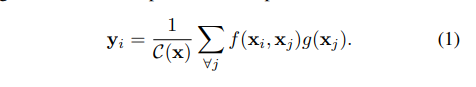

- i is the index of an output position
- j is the index that enumerates all posibile positions
- x is the input
- y is the output signal that has the same dimension as x
- $f$ computes a scalar between i and j which represents the relationship between i and j
- $g$ is a representation of the input at position j
- $1/C(x)$ is used for normalization

Since we are now including pairwise calculations of i permuted with every j, we are including global information. A convolution, on the other hand, would only consider the local region of say 3x3. Additionally, in a recurrent network architecture the i is typically based on the current/latest time step. One could argue that this method is simply a fully connected layer--we are just connecting one pixel fully to every other pixel. However, this is not quite the case as the above equation calculates a response between different locations while a fully connected layer uses learned weights. The relationship between two distant points is a function of the input data in the new architecture, whereas this is not true for a fully connected layer. Furthermore, a fully connected layer cannot handle variable input size and loses the positional relationships. The non-local operation has greater flexibility as well and can be inserted into the beginning (or end) of the network, compared to fully connected layers which are typically at the end of a CNN.

The authors then move on to define what choices for $f$ and $g$ should be. They show through experimentation later that these choices are not that important to overall model performance. For $g$ they consider a linear embedding $W_gx_j$ where $W_g$ is a learnable weight matrix and analagous to a 1x1 convolution or 1x1x1 convolution in spacetime. For $f$, more nuanced is involved and multiple functions are considered. The first function is Gaussian, which is simply $f(x_i, x_j) = e^{x^{T_i}x_j}$. An embedded Gaussian is considered to compute the similarity for embeddings, where we include a weight matrix $W_\theta$ and $W_\phi$ for the embeddings. They note that self-attention is a special case of the embedded Gaussian function. The embedded version of dot product is considered as it is similar to the embedded Gaussian without the presence of a softmax. Finally, they consider concatenation for as used in Relation Networks. Concatenation here is a little different as we see in the following equation:

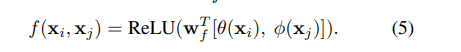

The weight vector is multiplied by the concatenated vector to produce a scalar and a ReLU is used as the activation. The authors argue that these functions presented above give greater flexibility and that options not explored here can further improve performance.

Moving on to the non-local block. We use equation 1 above to obtain an activation $z_i$ with the inclusion of the residual block, e.g. $z_i = W_zy_i + x_i$. The residual connection is useful in that it allows for a non-local block to be inserted into a pre-trained model. An illustrated example of a non-local block is provided below. They suggest using T=4 and H=W=14 or 7 and that the pairwise computation of a non-local block should be used in high-level, sub-sampled feature maps.

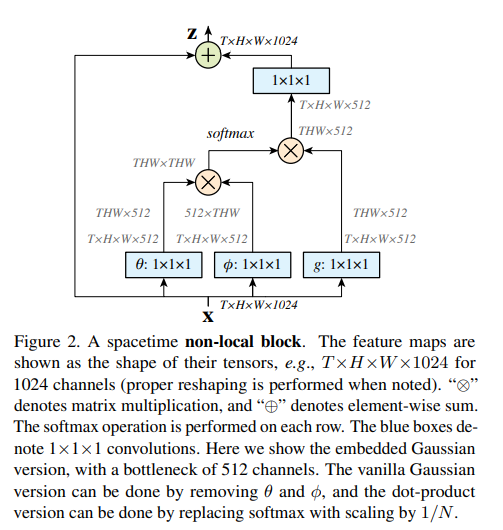

For nonlocal blocks, the channels $W_g, W_\theta, W_\phi$ are set to be half of that as $x$ and the weight matrix $W_z$ is a position-wise embedding on $y_i$. They utilize subsampling to improve efficiency by pooling and only utilize this in the spatial domain which greatly reduces the pairwise computation (by 1/4). Non-local behavior is not changed and the computation becomes sparse.

To see the non-local network's performance and behavior, ablation experiments on video classification tasks are performed. The baseline is a 2D convolutional neural network with ResNet-50 as the baseline architecture (see below). The temporal domain is not considered in this first example besides in the pooling layers which aggregate the temporal information.

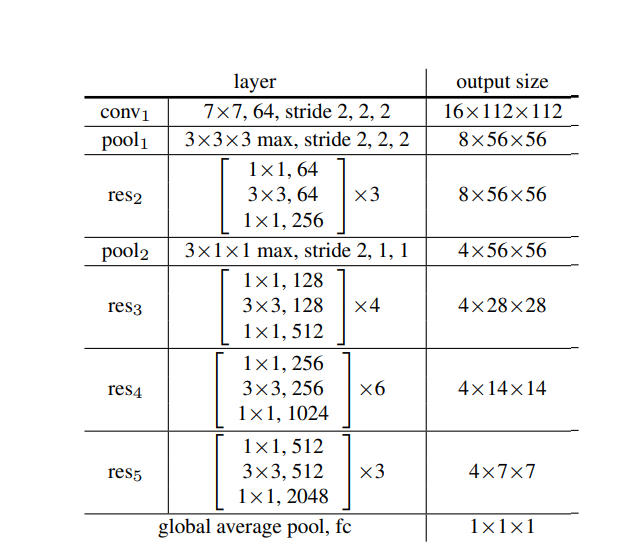

Now we consider the 3D ConvNet by inflating the kernels by changing the kernel size from $1 \times k \times k$ to $t \times k \times k$, where t is now the temporal dimension. The kernel is initialized by the pre-trained $k \times k$ weights on ImageNet and rescaled by $1/t$. They inflate this kernel in a residual block to $3 \times 3 \times 3$ or change the first $1 \times 1$ kenrel in the residual block to $3 \times 1 \times 1$. Since these operatioins introduce additional computational complexity, they are used sparingly with one kernel for every 2 residual blocks being changed. Non local blocks are inserted into both the 2D net and 3D net to transform them into non-local nets.

For implmentation of these models, they present their model parameters, how many interations trained, the optimizer, etc. These are useful for the direct implementation of these models but will distract from the main points of this paper, so I will leave these details out. Something we should note, though, is that batch normalization is enabled when fine tuning the model, which went against common convention. For inference, they sample 10 clips evenly from a video and compute the softmax scores individually. The final prediction is a result of averaging the softmax scores of all the clips. Experiments are performed on the Kinetics dataset which contains 650,000 clips of human actions. The training process is visualized below. 

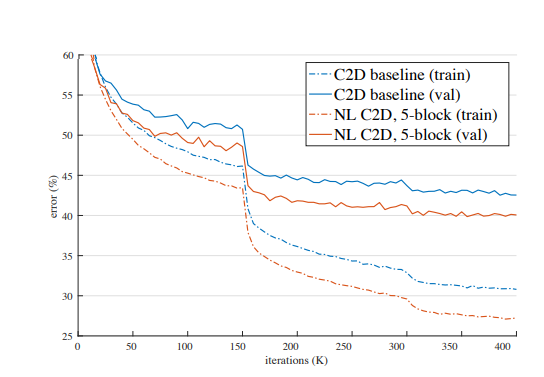

You can see that the 2D model without the non-local blocks performs much worse than those that do contain the non-local blocks (denotes NL in the legend). This suggests that the non-local blocks do in fact find relationships over distance and time and are not confined to local features. This is demonstrated in the figure below. We see in the bottom left image that the position located around the ball ($x_i$) contains relationships to the overall body position of the player in other frames ($x_j$s). The inclusion of even a single non-local block before the last residual block in the model was found to improve results by 1% over the baseline. To better understand where non-local blocks should be placed, they examined adding them at different stages of ResNet. Inserting the block at different stages did not have profoundly different results. Furthermore, the authors state that all of the functions used for $g$, as discussed previously, have similar performance and it is likely the ability to capture non-local dependencies itself that is important--not the choice of function to do so. However, they choose to focus on the embedded Gaussian for the remainder of the experiments.

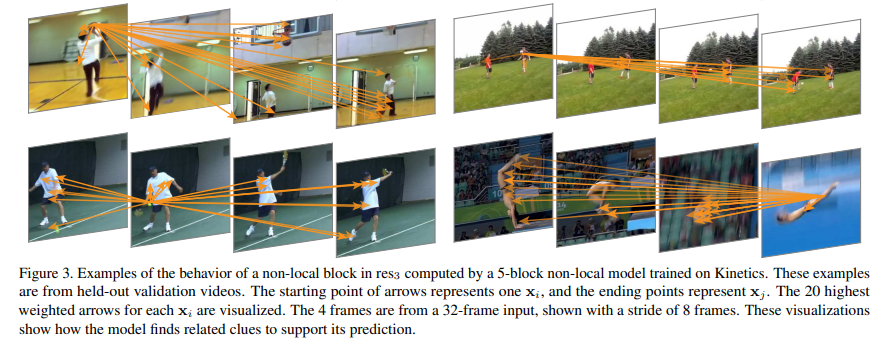

Next, they experiment with adding varying numbers of non-local blocks to different stages in their backbone ResNet model. They experiment by adding 1 block to the 4th stage, 3 blocks to the 4th stage and 2 to the 3rd stage (every other residual block), and 10 total blocks to ever residual block in the 3rd and 4th stages. The following table best summarizes the results: 

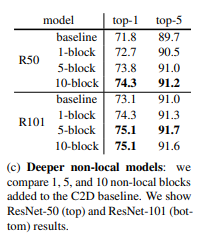

The authors also extend their experiments beyond the Kinetics dataset. Another dataset used to validate the performance of the new architecture is the Charades dataset. They utilize their pre-trained Kinetics models and find that their models outperform those in the previous competition, which were also pre-trained on Kinetics. MS COCO is used to evaluate the architecture's performance on object detection in which they use Mask R-CNN as the baseline model. They modify the model by adding a non-local block right before the last residual block and fine-tune from ImageNet pre-training. As seen in the table below, inserting their non-local block improves the performance in object detection when using average precision as their metric.

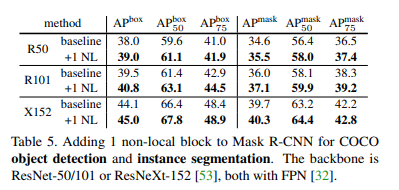

The increased performance seen here is not a result of drastically increasing model capacity, as we have discussed before. The addition of the non-local block adds <5% computation to the baseline model and results in a performance increase of ~1%. We then turn our attention to keypoint detection. In the base Mask R-CNN model, a stack of 8 convolutional layers are used to predict keypoints as 1-hot masks. Because these are determined by local operations, they insert 4 non-local blocks into the keypoint head after every 2 convolutional layers. Compared to their baseline model, they are able to obtain an increase of up to 1.4 points of keypoint AP over their baseline.

In conclusion, we examined how the addition of non-local blocks (particularly on residual paths) lead to an increase in performance on several different tasks. These blocks introduce minor computational complexity for a decent improvement in performance. We will see in the next paper how we can explicity incorporate an attention mechanism when dealing with image data--an idea hinted at in this report.

### Self-Attention Generative Adversarial Networks

Sources:
Paper: http://proceedings.mlr.press/v97/zhang19d/zhang19d.pdf

Inception Score: https://machinelearningmastery.com/how-to-implement-the-inception-score-from-scratch-for-evaluating-generated-images/

Frechet Inception Distance: https://machinelearningmastery.com/how-to-implement-the-frechet-inception-distance-fid-from-scratch/#:~:text=The%20Frechet%20Inception%20Distance%20score,for%20real%20and%20generated%20images.&text=The%20Frechet%20Inception%20Distance%20summarizes,images%20in%20the%20same%20domain

Spectral Normalization and Conditional Batch Normalization: https://medium.com/towards-artificial-intelligence/techniques-in-self-attention-generative-adversarial-networks-22f735b22dfb

Self-Attention Generative Adversarial Network (SAGAN) is a unique GAN in that it incorporates an attention mechanism to establish longer-range dependencies for image generation. Traditionally, images are generated from local points in lower resolution feature maps, however, SAGAN has the ability to use context from all feature locations through its attention mechanism. This new model has promising results, with an Inception score of 52.52. The Inception score is named after the Inception v3 model where probabilities are obtained from the model for an image beloning to a particular class. The previous best was 36.8 and achieving a Frechet Inception distance (FID) from 27.62 to 18.65 on the ImageNet dataset. FID used to compare the quality of generated images to known real images of the same class, something the Inception score alone cannot do. The metric still utilizes Inception v3, however, the last pooling layer is used to capture features for real and generate images. The mean and covariance of the images real and generated images are calculated and the distance between the two distributions is known as the Frechet distance. Furthermore, examining the attention layers allows one to visualize where the GAN is focusing in the process of generating images--it shows that they correspond to a wider area of object shapes rather than just local regions of fixed shape.

Relatively recently (in terms of this paper) saw the introduction of convoltuional GANs which showed success in image generation, however, struggledd with multiple classes. For example, ImageNet GAN does well with landscape features but struggles to capture geometric patterns well. They give the example of a dog with excellent fur texture, but the feet are not visually separated. The researchers argue that since convolutions only have a local receptive field, they lack the long-range dependencies other models can capture. Multiple layers are needed in order to learn these long range dependencies in a convolution model, which may not exist in small models and optimizers may have issues when it comes to "coordinating" parameters between layers. An self-attention module can calculate the weighted sum of the features at all positions which only introduces minor computational complexity and is a good balance to learn long-range dependencies and complexity. In this work, the researchers also incorporate network conditioning to improve GAN performance.

First we will examine other the related works. GANs have seen widespread use in the realm of image generation, super resolution, and with text-to-image. Recent research on GANs have introduced a variety of methods to reduce reliance on hyperparameter tuning and increase stability which will be utilized by the authors. As for attention mechanisms, they have become vital in capturing global dependencies by looking at responses in sequential data while simultaneously examining attending to all positions in the sequence. These mechanisms have seen great use in domain of NLP in translation models. A previous paper used self attention to model spatial-temporal dependencies in video sequences, but the use of a self attention mechanism has yet to be implemented in the field of GANs.

Most GANs used for image reconstruction/generation are convolutional based and thus utilize only localized regions which cannot effectively model long range dependencies in images. To construct SAGAN, they adapt a non-local model proposed in the paper Non-local Neural Networks to introduce the self-attention module. The construction of the model is as follows:

1. Image features from a previous hidden layer of dimensions $C \times N$ (C being channels and N being feature locations) are transformed into two feature spaces for the attention calculation. $f(x) = W_fx$ and $g(x) = W_gx$. The following equation describes how the model attends to the $i^th$ region when synthesizing the $j^th$ region.

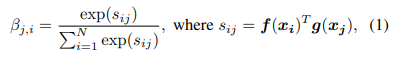

We recieve the output of the attention layer $o = (o_1, o_2, ..., o_j, ..., o_n$ which has dimension $C \times N$ where 

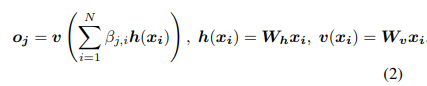

The weight matricies denoted by $W$ are learned $1 \times 1$ convolutions and have dimenion $C/8 \times C$. $C$ is divided by 8 in this case as it was found there was no performance decrease when testing lower numbers to reduce channel dimension and for memory efficiency. The attention output is is multiplied by a scale  parameter and the input feature map is added back such that $y_i = \gamma o_i + x_i$ where $\gamma$ is learnable. The argument for introducing $\gamma$ is that it will first learn locally, but then expand to assign greater weight to features outside of the local region. This results in the model learning an easy task first that will progressively become more difficult. The attention mechanism proposed here is applied to both the generator and descriminator models and are trained using hinge adversarial loss.

Next, the paper examines ways to stabilize the training of GANs. One technique used is Spectral Normalization in the generator and descriminator models and use the two-timescale update rule (TTUR) as proposed in the paper GANs Trained by a Two Time-Scale Update Rule Converge to a Local Nash Equilibrium. In short, the TTUR utilizes two learning rates--one for the generator and one for the descriminator. Since both of these papers are quite technical I turned to the Medium post linked in the sources to help simplify how they work. The spectral norm of a matrix is equal to the largest singular value and is the largest eigenvalue for a symmetric real matrix.The authors of the SAGAN paper showed that using this method with Adam is less apt to get stuck in a local minima as it prefers a "flat" minima, rather than a sharp local minima. Additionally, spectral normalization regularizes the gradient of the weight matrix in the loss function which is analagous to an L2 regularization. The calculation is as follows:
- With a weight matrix of dimension $N \times M$, we randomly initialize a vector u
- Take $v={Weight}^{power}u$ / $||({Weight}^{power}u)||_2$ where we typically set power=1 as we take small steps in the learning phase
- u = $Wv$ / $||Wv||_2$
- Spectral norm is calculated as: $\sigma(W) = u^{power}Wv$


The purpose of using TTUR is to increase the speed at which the discriminator was trained and allows for better results in the same amount of computation time as a network without TTUR. The benefit of using spectral normalization here is that it does not require additional hyper-parameters and the computational complexity is low. The researchers found that introducing this into both the generator and descriminator allows for fewer discriminator updates per generator update (thus speeding up the training process) and made the training process more stable. 

Moving on to the experiments. The ImageNet dataset and first evaluate the effectiveness of spectral normalization and TTUR for stabilizing training. Then we will examine the effectiveness of the self-attention mechanism and how SAGAN compares to state-of-the-art models. To evaluate the models, they used Inception score and FID (mentioned previously) as their evaluation metric. Remember that higher inception score is indicative of better image quality and is easily comparable to other models. However, it does not assess the realism of the image just that the image generated belongs to a particular class. Therefore, they also look at FID as it has been shown to align with human evaluation when assessing the realism of an image. They note that since FID is calculated over the whole data distribution, they also compute FID within each class (intra FID) to get a better understanding of how close generated images are to real data. 50,000 samples are used for evaluation and the Inception score, FID, and intra FID are analyzed.

The SAGAN models are trained to generate $128 \times 128$ sized images and include the normalization techniques mentioned previously as well as conditional batch normalization in the generator and projection in the discriminator (as mentioned in the paper cGANs with Projection Discriminator. Conditional batch normalization conditions $\gamma$ and $\beta\$, the learnable parameters in batch norm, on $x$ such as an embedding. This is accomplished by adding $f(x)$ to $\gamma$ and $h(x)$ to $\beta$ where $f$ and $h$ are arbitrary functions. For the projection discriminator, there are a series of derivations presented in the previously mentioned paper that is found by taking the derivative of the loss function equal to 0 and introducing a sigmoid function where we can solve for the joint distribution of the data given it is in a particular class. In the end, we end up with a structure that looks like: 

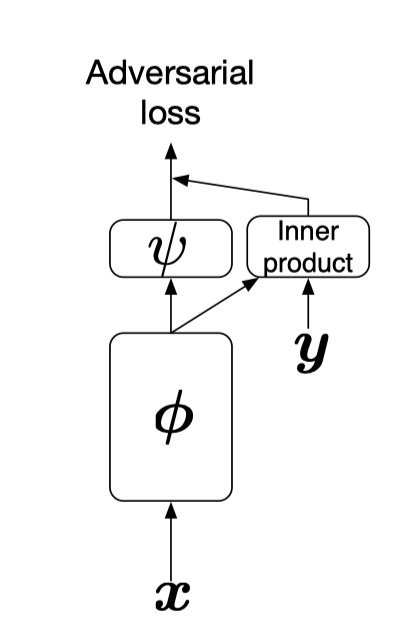

- feed in x to a normalization function (phi and psi)
- introduce the class label y via an inner product
- add both paths together

Back to the discussion on the experiments--we incorporate these into our model and use the Adam optimizer. The learning rate is set to 0.0004 for the discrimnator and 0.0001 for the generator. To verify the effectiveness of the stabliziation techniques and the results are as follows:

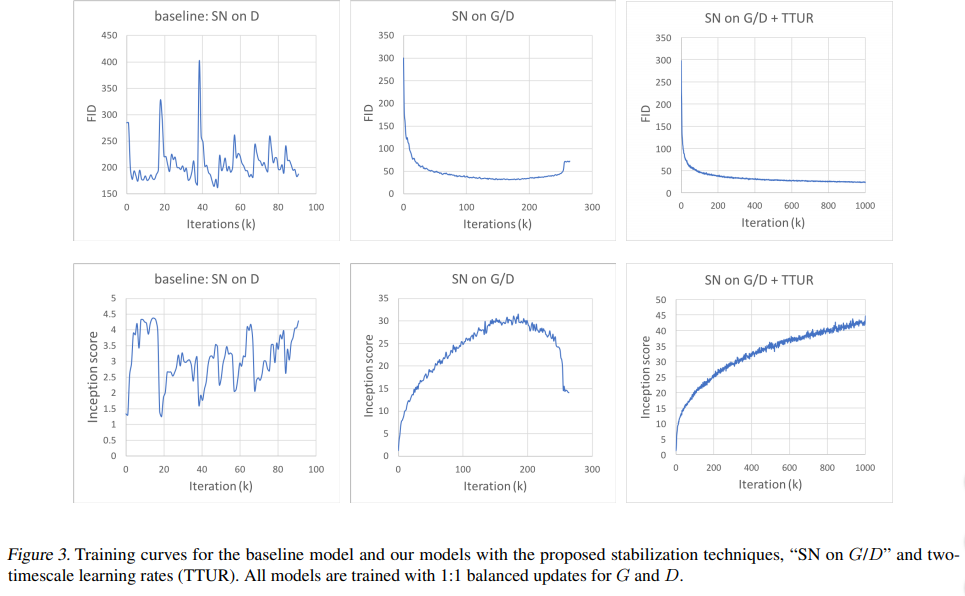

We can see that overall, performance is increased with an increasing amount of non-local blocks. This is especially true for ResNet-50 where performance increases monotonically, but plateaus under ResNet-101. Note how adding these blocks does not simply improve performance because we are increasing depth. The 5 block ResNet-50 model actually performs better than the 5 block ResNet-101 model with 80% of the FLOPS. The researchers suggest that adding this blocks is complementary to going deeper and not comepletely equivalent to adding addition depth to a model. In another experiment, they utilize non-local blocks to test whether they can capture relationships between spacetime. For their space only model, the non-local dependencies happen only in the frame. Table 2d in the paper demonstrates that utilizing the block to capture spacetime yields great results. Instead of considering space only or time only, they achieve the best results when utilizing the space-time version, which shows that their mechanism is able to effectively capture these relationship. Additionally, the non-local 2D model outperforms the 3D convolutional model with the same number of parameters but less FLOPs. Including the non local blocks in the 3D network does improve performance, though.

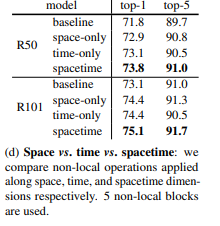

The researchers tested the model's ability on longer input sequences consisting of 128 consecutive frames and are 4 times as long as before. Since this task requires much more memory, the batch normalization layers are frozen due to an extremely small batch size of 2 clips. As one would expect, the models perform better and we see increased performance across the board. Compared to other state of the art models, this new architecture performs extremely well on the Kinetics dataset. Interestingly, they are able to achieve state of the art performance using visual data only while other models were also able to incorporate audio signals--these models are in gray below:

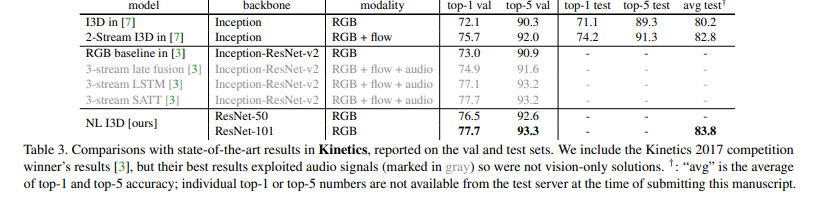


We can see the sequential implementation of spectral normalization on the discriminator, the generator and discriminator, and finally spectral normalization with two-timescale update rule. The top 3 charts use FID as the metric, while the bottom 3 use Inception score. We see that implementing spectral spectral normalization in both the discriminator and generator vastly improves stability in training as the curves for FID/Inception score show vastly reduced variability. Introducing the TTUR, we see that we achieve even greater stability and do not experience the dip in performance as seen in previous graph. Imabalanced learning rates produce monotonically increasing image quality even after 1 million iterations. These models were trained with a 1:1 balance of updates of the discriminator to generator as it promotes faster convergence.  

Now we examine the self-attention mechanism. They inserted the mechanism in the middle-to-high level of feature maps and found that they performed better than those with the mechanism at low level feature maps. The full results are in the table below.

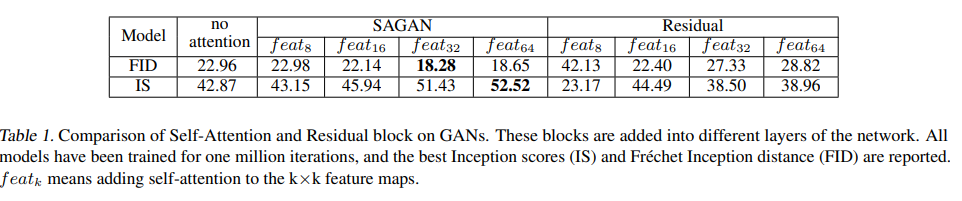

From the table, we see that we have a decent performance improvement over the models with no attention for both FID and the Inception score. Performance was very similar for inserting the attention mechanism at the level of $feat_32$ and $feat_64$. The reason the performance is better at these layers is that the attention mechanism has more evidence and more/larger feature maps to attend to. In other words, it is able to capture long-range dependencies at these deeper levels as further supported by the poor performance at shallower feature maps where only local dependencies can be modeled. Replacing the self-attention block with a residual block with 8x8 feature maps decreases the model performance and demonstrates that increased model performance is not due to increased model capacity. Now for what has become my favorite part of these papers that implement attention mechanisms--visualizing attention the weights. 

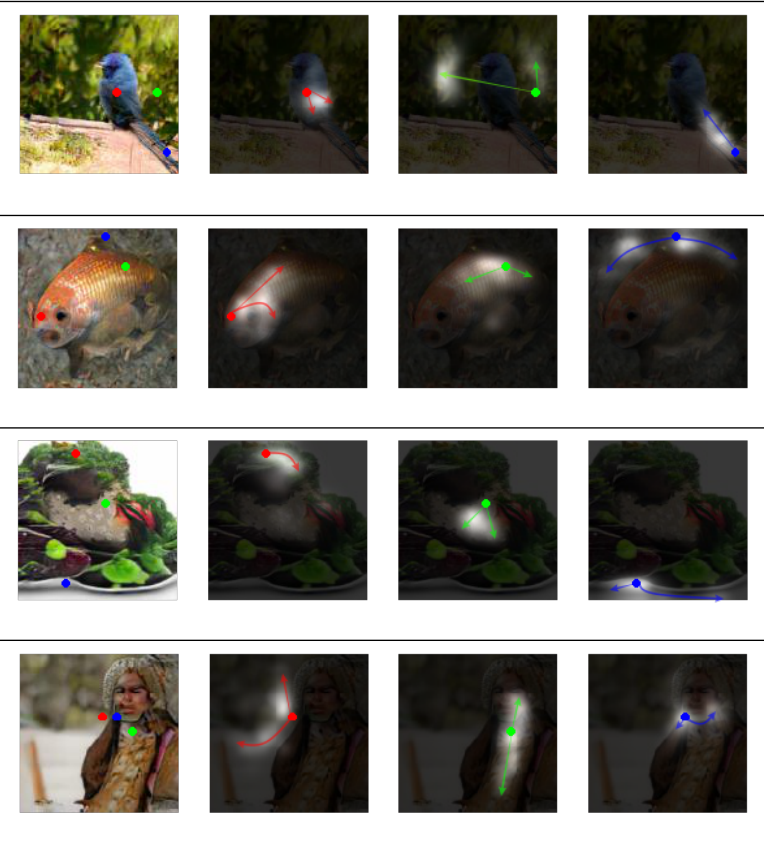

Looking at these maps, one can see that the network attends to color and texture and not just local spatial features. They point out that in the upper left example, the red attention map focuses on the body of the bird while the green feature map focuses on creating a consistent background from one side of the image to the other. The blue point attends to the tail specifically, ensuring the generation of that part is coherent. As most indicative by the green attention map, this sort of image generation is not possible with convolutions alone as convolutions would not be able to hold consistent information obtained from the other side of the image. Here we see what makes SAGAN special in directly visualizing its ability to capture those long range dependencies. So how does this compare to the state of the art methods at the time? This new architecture achieves the best Inception score compared to the leading models, AC-GAN and SNGAN-projection. Furthermore, Intra FID is the lowest of the 3 models and a lower FID than SNGAN-projection as AC-GAN did not have the score available. In other words, SAGAN generates the most realistic looking images and is able to generate images with complex patterns such as a goldfish. However, classes with more complex texture patterns than geometric patterns perform worse with SAGAN compared to SNGAN. This is due to the attention block focusing more on long-range dependencies in structural patterns but can lack robustness when it comes to features that are more local in scope.

In conclusion, the key takeways from the paper showed that implementing spectral normalization into the generator improved stability during training. In conjunction with spectral normalization, adding a two-timescale update rule (TTUR) also increased performance and provides stability during training. The use of a self-attention mechanism allows for modeling of long-range dependencies, slightly at the cost of modeling local features such as textures.